In [1]:
import os
import random
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.tag import pos_tag
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim 
from gensim.models import Word2Vec
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Import data and explore data structure**

In [2]:
#train datafile 
review_data = pd.read_csv("../input/shopeereview/train.csv", index_col=0, encoding='utf-8')
#review_data = pd.read_csv(r"D:\University\FYP\ShopeeProductReviewsSentimentAnalysis\Shopee Reviews Data\train.csv", index_col=0)
review_data = review_data.sample(frac=1)
review_data=review_data.rename(columns={'label': 'rating'})
review_data.head()

,review,rating
review_id,,
78031,"Fast Ship, sp used very thich😘",4
28572,"Thank God, the quality is good, it also ori pr...",3
70722,Excellent product quality excellent product p...,4
44823,Thank you to Walo there the goods delivered bu...,3
109344,Packing neatly. Her nyampe cepet really. Respo...,5


In [3]:
review_data.reset_index(drop=True, inplace=True)
review_data.head()

,review,rating
0,"Fast Ship, sp used very thich😘",4
1,"Thank God, the quality is good, it also ori pr...",3
2,Excellent product quality excellent product p...,4
3,Thank you to Walo there the goods delivered bu...,3
4,Packing neatly. Her nyampe cepet really. Respo...,5


In [4]:
review_data.describe()

,rating
count,146811.000000
mean,3.562764
std,1.260537
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [5]:
review_data.groupby('rating').describe()

review                                              
        count unique                               top freq
rating                                                     
1       14785  13807   The product quality is not good  138
2       12705  11262         Product quality standards  215
3       35941  28479              Good product quality  550
4       41865  31931         Excellent product quality  692
5       41515  31407         Excellent product quality  674

In [6]:
def label(df):
  if (df['rating']==5 or df['rating']==4):
    return 2
  elif (df['rating']==3):
    return 1
  else:
    return 0

In [7]:
review_data['label']= review_data.apply(label, axis=1)
review_data

,review,rating,label
0,"Fast Ship, sp used very thich😘",4,2
1,"Thank God, the quality is good, it also ori pr...",3,1
2,Excellent product quality excellent product p...,4,2
3,Thank you to Walo there the goods delivered bu...,3,1
4,Packing neatly. Her nyampe cepet really. Respo...,5,2
...,...,...,...
146806,Cepat sampay,3,1
146807,already up but have not been opened. I hope al...,3,1
146808,Batik really good ... thanks yaaaaaaaaaaaaaaaaa,4,2
146809,Delivery a bit long,3,1


In [8]:
review_data.groupby('label').describe()

rating                                             
         count      mean       std  min  25%  50%  75%  max
label                                                      
0      27490.0  1.462168  0.498576  1.0  1.0  1.0  2.0  2.0
1      35941.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0
2      83380.0  4.497901  0.499999  4.0  4.0  4.0  5.0  5.0

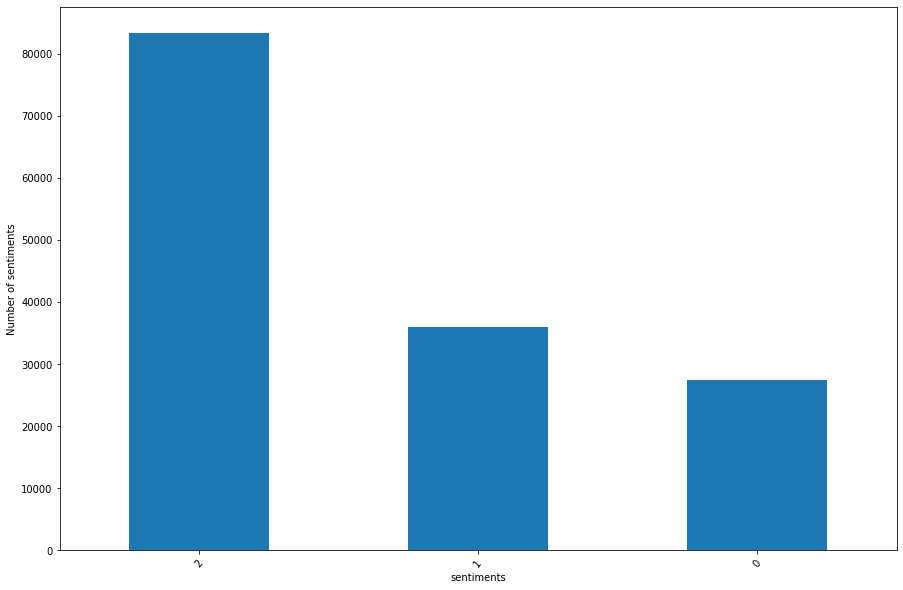

In [9]:
#plot the number of labels with bar chart
label= review_data.groupby("label")
plt.figure(figsize=(15,10))
label.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("sentiments")
plt.ylabel("Number of sentiments")
plt.show()

## **WordCloud**

In [10]:
#generate wordcloud
review_text_postivie= " ".join (review for review in review_data.review[(review_data['label']== 2)])
print ("There are {} words in the combination of positive review.".format(len(review_text_postivie)))

There are 7421952 words in the combination of positive review.


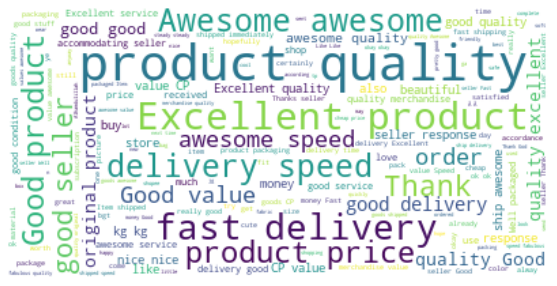

In [11]:
#create stop_word list
stop_words=set(stopwords.words('english'))

#generate a positive word cloud image 
postivie_wordcloud= WordCloud(stopwords=stop_words, background_color="white").generate(review_text_postivie)

#display the generated image
plt.figure(figsize=(10,5))
plt.imshow(postivie_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Neutral Reviews

In [12]:
#generate wordcloud
review_text_neutral= " ".join (review for review in review_data.review[(review_data['label']== 1)])
print ("There are {} words in the combination of neutral review.".format(len(review_text_neutral)))

There are 3090283 words in the combination of neutral review.


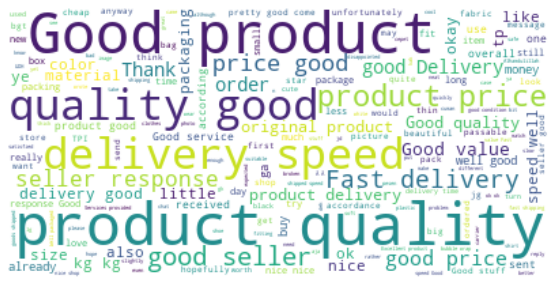

In [13]:
#generate a neutral word cloud image 
neutral_wordcloud= WordCloud(stopwords=stop_words, background_color="white").generate(review_text_neutral)

#display the generated image
plt.figure(figsize=(10,5))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Negative reviews

In [14]:
#generate wordcloud
review_text_negative= " ".join (review for review in review_data.review[(review_data['label']== 0)])
print ("There are {} words in the combination of negative review.".format(len(review_text_negative)))

There are 2576593 words in the combination of negative review.


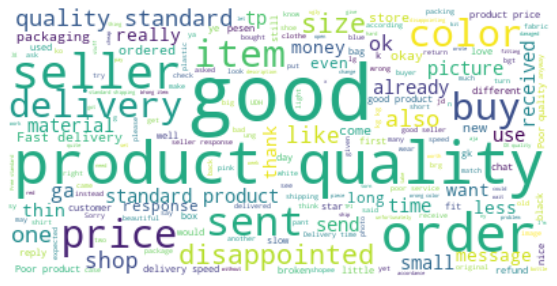

In [15]:
#generate a negative word cloud image 
negative_wordcloud= WordCloud(stopwords=stop_words, background_color="white").generate(review_text_negative)

#display the generated image
plt.figure(figsize=(10,5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Split data into test and train**

In [16]:
review_data.drop('rating', axis=1, inplace=True)

In [17]:
#label
y= review_data.label
#features
x=review_data.drop('label', axis=1)

In [18]:
#split into test and train dataset with test size 20% 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,review
77018,Discrepant ring resized images and incongruous...
98235,"- a pool of very good quality, a grade no prob..."
47031,Good product quality Good value for money
93148,"Message mustard and moss, sent mustard toska, ..."
72057,The product quality is excellent. The product...


In [19]:
x_train.describe()

,review
count,117448
unique,92589
top,Excellent product quality
freq,1104


In [20]:
x_test.describe()

,review
count,29363
unique,23888
top,Excellent product quality
freq,274


## **Emoji Preprocessing**

In [21]:
import emoji

#Get the dataframe with emoji in review column 
have_emoji_train= []
for i,review in enumerate (x_train['review']):
  if any (char in emoji.UNICODE_EMOJI['es'] for char in review):
    have_emoji_train.append(i) 

In [22]:
print(f'{len(have_emoji_train)} reviews has emojis in train dataset. It means {len(have_emoji_train) / len(x_train) * 100} % from train dataset')

14740 reviews has emojis in train dataset. It means 12.550234997615966 % from train dataset


In [23]:
x_train.iloc[have_emoji_train]

,review
70240,"MashaAllah already order berkalikali, happy to..."
85832,"Muantuuulululuululululululul 86, hopefully dur..."
81422,"Nice products, fast delivery, has pockets 🌸🌸🌸🌸..."
31836,Thankyou! Free brochure with more and more ......
105379,"Shipper delivery came in wearing k test, when ..."
...,...
70831,Baguuussssssssssssssssss okeeeeeeeeeeeedddeee ...
135574,"Good quality, original, good price, fast, good..."
101002,Sgt easily dealt with pjual .... ready no free...
146419,"Fast delivery, wrapped themselves quite like p..."


In [24]:
#test dataframe
have_emoji_test= []
for i,review in enumerate (x_test['review']):
  if any (char in emoji.UNICODE_EMOJI['es'] for char in review):
    have_emoji_test.append(i) 

In [25]:
print(f'{len(have_emoji_test)} reviews has emojis in test dataset. It means {len(have_emoji_test) / len(x_test) * 100} % from test dataset')

3758 reviews has emojis in test dataset. It means 12.798419779995232 % from test dataset



*   Demojize emoji (change the emoji to text)
*   Delete repeated emoji 




In [26]:
def emoji_preprocessing(text):

  #demojize 
  #example: Python is :thumbs_up:
  text= emoji.demojize(text).replace (':', ' ')

  #delete repeated emoji 
  tokenize= text.split()
  repeated_list=[]
  for word in tokenize:
    if word not in repeated_list:
      repeated_list.append(word)
    
  
  text=' '.join(word for word in repeated_list)
  text= text.replace("_", " ").replace("-", " ")
  return text


In [27]:
x_train['clean_emoji_text']= x_train['review'].apply(emoji_preprocessing)
x_test['clean_emoji_text']= x_test['review'].apply(emoji_preprocessing)

In [28]:
print("A review example of dataset before cleaning:", end="\n\n")
x_train.iloc[have_emoji_train]['review']


A review example of dataset before cleaning:



70240     MashaAllah already order berkalikali, happy to...
85832     Muantuuulululuululululululul 86, hopefully dur...
81422     Nice products, fast delivery, has pockets 🌸🌸🌸🌸...
31836     Thankyou! Free brochure with more and more ......
105379    Shipper delivery came in wearing k test, when ...
                                ...                        
70831     Baguuussssssssssssssssss okeeeeeeeeeeeedddeee ...
135574    Good quality, original, good price, fast, good...
101002    Sgt easily dealt with pjual .... ready no free...
146419    Fast delivery, wrapped themselves quite like p...
88013     The model is different as photographed anyway,...
Name: review, Length: 14740, dtype: object

In [29]:
print("clean_emoji_text:")
x_train.iloc[have_emoji_train]['clean_emoji_text']

clean_emoji_text:


70240     MashaAllah already order berkalikali, happy to...
85832     Muantuuulululuululululululul 86, hopefully dur...
81422     Nice products, fast delivery, has pockets cher...
31836     Thankyou! Free brochure with more and ... ambi...
105379    Shipper delivery came in wearing k test, when ...
                                ...                        
70831     Baguuussssssssssssssssss okeeeeeeeeeeeedddeee ...
135574    Good quality, original, good price, fast, sell...
101002    Sgt easily dealt with pjual .... ready no free...
146419    Fast delivery, wrapped themselves quite like p...
88013     The model is different as photographed anyway,...
Name: clean_emoji_text, Length: 14740, dtype: object

## **Text-preprocessing**
*   Part of speech tag
*   lemmetization
*   tokenization 
*   remove stop-words 

In [30]:
#Repeated char function 
def repeated_char(text):
  text = re.sub(r'(\w)\1{2,}',r'\1',text)
  return text

In [31]:
repeated_char_train = []
for i, review in enumerate(x_train['clean_emoji_text']):
  if re.match(r'\w*(\w)\1+',review):
    repeated_char_train.append(i)

In [32]:
len(repeated_char_train)

34397

In [33]:
x_train['clean_text_duplicate']=x_train['clean_emoji_text'].apply(repeated_char)
x_test['clean_text_duplicate']=x_test['clean_emoji_text'].apply(repeated_char)

In [34]:
print("A review example of dataset before cleaning:", end="\n\n")
x_train.iloc[repeated_char_train]['clean_emoji_text']


A review example of dataset before cleaning:



47031                  Good product quality value for money
93148     Message mustard and moss, sent toska, ga disco...
19189     Hiii seller the items have safely arrived. The...
70240     MashaAllah already order berkalikali, happy to...
85832     Muantuuulululuululululululul 86, hopefully dur...
                                ...                        
9614                              Excellent product quality
34620     Excellent product quality very good price prod...
9118      Terimakaiiiihhhh pesanananya already arrived s...
131329                                           poor thing
85476     Excellent quality Very accommodating seller We...
Name: clean_emoji_text, Length: 34397, dtype: object

In [35]:
print("A review example of dataset after cleaning:", end="\n\n")
x_train.iloc[repeated_char_train]['clean_text_duplicate']


A review example of dataset after cleaning:



47031                  Good product quality value for money
93148     Message mustard and moss, sent toska, ga disco...
19189     Hi seller the items have safely arrived. The i...
70240     MashaAllah already order berkalikali, happy to...
85832     Muantulululuululululululul 86, hopefully durab...
                                ...                        
9614                              Excellent product quality
34620     Excellent product quality very good price prod...
9118      Terimakaih pesanananya already arrived safely ...
131329                                           poor thing
85476     Excellent quality Very accommodating seller We...
Name: clean_text_duplicate, Length: 34397, dtype: object

In [36]:
def NormalizeWithPOS(text):
    # Lemmatization & Stemming according to POS tagging

    #tokenize snetence into a list of single words 
    word_list = word_tokenize(text)
    rev = []
    
    lemmatizer = WordNetLemmatizer() 
    stemmer = PorterStemmer() 
    
    #pos_tag() get the POS tag of given word 
    #'J'--> Adjective 
    #'V'--> Verb
    #'N'--> Noun
    #'R'--> Adverb 
    
    for word, tag in pos_tag(word_list):
        if tag.startswith('J'):
            w = lemmatizer.lemmatize(word, pos='a')
        elif tag.startswith('V'):
            w = lemmatizer.lemmatize(word, pos='v')
        elif tag.startswith('N'):
            w = lemmatizer.lemmatize(word, pos='n')
        elif tag.startswith('R'):
            w = lemmatizer.lemmatize(word, pos='r')
        else:
            w = word
        w = stemmer.stem(w)
        rev.append(w)
    review = ' '.join(rev)
    return review

In [37]:
def cleanText(text):
    
    #replace some specific words 
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(' +', ' ', text)
    text = text.strip().lower()

    if embedding is not 'BERT':
        text = re.sub(r"[0-9]+", ' ', text)
        text = re.sub(r"-", ' ', text)

    if embedding is 'WORD2VEC_NO_STOP':
        #remove stop words 
        default_stop_words = set(stopwords.words('english'))
        default_stop_words.difference_update({'no', 'not', 'nor', 'too', 'any', "n't",
                                              'don', "don't","but",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
                                              'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', 
                                              "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', 
                                              "shan't", 'shouldn',
                                              "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"})
        stop_words = default_stop_words.union({"'m", "'d", "'re", "'s",
                                                  'would','must',"'ve","'ll",'may'})
        word_list=text.split()
        filtered_list=[w for w in word_list if not w in stop_words]
        text=" ".join(filtered_list)

    # #remove stop words 
    # default_stop_words = set(stopwords.words('english'))
    # default_stop_words.difference_update({'no', 'not', 'nor', 'too', 'any', "n't"})
    # stop_words = default_stop_words.union({"'m", "'d", "'re", "'s",
    #                                               'would','must',"'ve","'ll",'may'})
    # word_tokens=word_tokenize(text)
    # filtered_list=[w for w in word_tokens if not w in stop_words]
    # text=' '.join(filtered_list)    

    # Replace punctuations with space
    if embedding is 'BERT': # save ! ? . for end of the sentence detection [,/():;']
        filters='"#$%&*+<=>@[\\]^_`{|}~\t\n'
        text = re.sub(r'\!+', '!', text)
        text = re.sub(r'\?+', '?', text)
    else:
        filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    
    if embedding is 'BERT':
        text = re.sub(r'\( *\)', ' ', text)

    if embedding is not 'BERT':
        text = ' '.join([w for w in text.split() if len(w)>1])

    text = ''.join(text)

    return text

In [38]:
embedding=''
#word2vec with stopwords
x_train['clean_text']= x_train['clean_text_duplicate'].apply(cleanText)
x_test['clean_text']=x_test['clean_text_duplicate'].apply(cleanText)

In [39]:
print("A review example of dataset before cleaning:", end="\n\n")
print(x_train.iloc[1112]['review'], end='\n\n')


print("clean_text:")
print(x_train.iloc[1112]['clean_text'], end="\n\n")

A review example of dataset before cleaning:

 Excellent quality

clean_text:
excellent quality



In [40]:
#normalized with POS 
#for BOW and TF-IDF
x_train['clean_text_normalized']=x_train['clean_text'].apply(NormalizeWithPOS)
x_test['clean_text_normalized']=x_test['clean_text'].apply(NormalizeWithPOS)

In [41]:
print("A review example of dataset before cleaning:", end="\n\n")
print(x_train.iloc[1112]['review'], end='\n\n')


print("clean_text_normalized:")
print(x_train.iloc[1112]['clean_text_normalized'], end="\n\n")

A review example of dataset before cleaning:

 Excellent quality

clean_text_normalized:
excel qualiti



## *Word2Vec without Stopwords*

In [42]:
embedding='WORD2VEC_NO_STOP'
# for Word2Vec without stop words
x_train['clean_text_w2v_no_stop'] = x_train['clean_text_duplicate'].apply(cleanText)
x_test['clean_text_w2v_no_stop'] = x_test['clean_text_duplicate'].apply(cleanText)

In [43]:
print("A review example of dataset before cleaning:", end="\n\n")
print(x_train.iloc[1112]['review'], end='\n\n')


print("clean_text_w2v_no_stop:")
print(x_train.iloc[1112]['clean_text_w2v_no_stop'], end="\n\n")

A review example of dataset before cleaning:

 Excellent quality

clean_text_w2v_no_stop:
excellent quality



## **BERT Text Preprocessing**

In [44]:
embedding='BERT'
x_train['clean_text_BERT']= x_train['review'].apply(cleanText)
x_test['clean_text_BERT']=x_test['review'].apply(cleanText)

In [45]:
print("A review example of dataset before cleaning:", end="\n\n")
print(x_train.iloc[1112]['review'], end='\n\n')


print("clean_text_BERT:")
print(x_train.iloc[1112]['clean_text_BERT'], end="\n\n")

A review example of dataset before cleaning:

 Excellent quality

clean_text_BERT:
excellent quality



## **Word2vec**
with stopwords

In [46]:
def wordTokenize(text):
  return word_tokenize(text)

In [47]:
words =x_train['clean_text'].apply(wordTokenize)
w2v_with_stop_model = gensim.models.Word2Vec(words, min_count =1,vector_size=300,window = 5)

In [48]:
# Transfrom the training data into feature vectors

def makeFeatureVec(review, model, num_features):
    '''
    Transform a review to a feature vector by averaging feature vectors of words 
    appeared in that review and in the volcabulary list created
    '''
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index_to_key) #index2word is the volcabulary list of the Word2Vec model
    isZeroVec = True
    for word in review:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model.wv[word])
            isZeroVec = False
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    '''
    Transform all reviews to feature vectors using makeFeatureVec()
    '''
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,300)
        counter = counter + 1
    return reviewFeatureVecs

In [49]:
word2vec_with_stop_training_features = getAvgFeatureVecs(x_train['clean_text'], w2v_with_stop_model,300)
word2vec_with_stop_test_features = getAvgFeatureVecs(x_test['clean_text'], w2v_with_stop_model,300)

In [50]:
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", w2v_with_stop_model.wv[10])

Show first 10 words in the vocalbulary list  vocabulary list: 
 [-0.40783393 -0.6610185  -0.24811785  1.6943767  -0.3621194   0.93790525
  0.2564695   0.24478148  1.0519556   1.3749719  -0.5487769  -0.55331475
  1.0749891  -1.9062258  -0.1688416   0.06112607 -0.18591423 -0.62428
  0.808827    0.7533052   0.50788337 -0.16614844  0.46005443 -0.70737237
  0.51459277  0.74386346  0.18305825 -0.5974993   0.48792705 -0.33607697
  1.703733    0.8624009   0.5185702   0.22763558  0.17231461 -0.6285538
  0.2800493   0.13303952 -1.0928457   0.47427267 -0.621933    0.2418376
  0.35910758  0.71224755 -1.2785586  -0.17251313 -0.29308525  0.18497805
 -0.03216637  0.4709132   0.12037704  0.22128761 -0.4447568  -0.05254085
 -0.515967    0.7790712   0.5154202  -1.1937615  -0.6465894   0.56799865
 -0.38084614  0.1381796   0.55818254  0.11819892 -0.3818586  -1.3454415
 -1.2904744  -0.00670631  0.3668808  -0.48020005 -0.59049803 -0.9206588
  0.443089    0.42563874 -0.05747947 -0.6582663   0.01489462  0.445

In [51]:
print("Number of words in the vocabulary list : %d \n" %len(w2v_with_stop_model.wv.index_to_key)) #4016 

Number of words in the vocabulary list : 44198 



In [52]:
print(word2vec_with_stop_training_features.shape)

(117448, 300)


In [53]:
print(word2vec_with_stop_training_features[1112])

[-0.01693847  0.13892879 -0.08887633  0.33414516  0.09373427  0.11430317
  0.05122492  0.35345313  0.3226545   0.06514438 -0.15017428  0.02765037
  0.00366447 -0.30733305  0.29115686  0.23365511 -0.10950981 -0.15769652
  0.18116437 -0.16336526 -0.08345099  0.05488333  0.09463526 -0.33615336
  0.04068496  0.20454815  0.10510831 -0.30122635 -0.28664812  0.18481782
  0.05861539  0.04086573 -0.21539585 -0.3440685   0.09071507 -0.03571793
 -0.04204754  0.12628639  0.12486099  0.06714735 -0.09944991  0.02173361
  0.23539388  0.17373456  0.1766696  -0.09434675 -0.0176721  -0.00488498
  0.23219667  0.12525591  0.2023246   0.16670057 -0.0814471  -0.06335159
  0.01378507  0.13605034 -0.06065863 -0.01685103 -0.01516707 -0.05202029
  0.08871879  0.11373829 -0.14529136  0.00718745  0.05693314 -0.19552334
  0.14530459 -0.07594024 -0.03830748 -0.10250071 -0.28161782 -0.43303826
 -0.09666175  0.20630595 -0.16119586  0.23799813 -0.06913678 -0.05401028
 -0.04786769  0.20499219  0.37821355 -0.0867387   0

In [54]:
print(word2vec_with_stop_test_features[1])

[-3.95656303e-02  9.51966569e-02 -9.16418359e-02  4.42449480e-01
  7.31999278e-02  8.20987001e-02 -2.17384752e-02  3.55504990e-01
  3.37887645e-01  5.77004477e-02 -2.30419621e-01  9.25290734e-02
 -4.28974144e-02 -2.67907053e-01  3.24844450e-01  1.95111200e-01
 -1.26315996e-01 -1.48476139e-01  2.56405920e-01 -1.68858171e-01
  6.14418928e-03  6.20316416e-02  1.64281324e-01 -4.00002569e-01
  9.70893651e-02  2.51678944e-01  4.57245149e-02 -2.69436240e-01
 -2.96666265e-01  2.25196168e-01  7.22768754e-02 -2.77840924e-02
 -2.21594766e-01 -3.17860961e-01  1.89401507e-02 -2.47850623e-02
 -6.73263296e-02  6.68378174e-02  1.13146417e-01  4.37800102e-02
 -1.41826719e-01  3.00113801e-02  2.53731161e-01  1.77773356e-01
  1.47742689e-01 -4.99837026e-02 -1.00836009e-01 -8.08844939e-02
  1.67809978e-01  6.46828189e-02  1.71883643e-01  1.59531608e-01
 -5.83989732e-02 -7.08465651e-02  8.87609720e-02  1.54512450e-01
 -1.47881866e-01 -5.53236715e-02 -2.17624996e-02 -7.42708370e-02
  9.37729701e-02  8.38238

## **Word2vec**
without stopwords

In [55]:
from statistics import *
def embeddToWord2Vec(text):
    words = word_tokenize(text)
    
    if embedding is 'WORD2VEC_WITH_STOP':
        result = [w2v_with_stop_model.wv[w] for w in words if w in w2v_with_stop_model.wv.index_to_key]
    else:
        result = [w2v_without_stop_model.wv[w] for w in words if w in w2v_without_stop_model.wv.index_to_key]
    
    feature = [mean(x) for x in zip(*result)]
    return feature

In [56]:
words =x_train['clean_text_w2v_no_stop'].apply(wordTokenize)
w2v_without_stop_model = gensim.models.Word2Vec(words, min_count =1,vector_size=300,window = 5)

In [57]:
print("Number of words in the vocabulary list : %d \n" %len(w2v_without_stop_model.wv.index_to_key)) #4016 

Number of words in the vocabulary list : 44193 



In [58]:
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", w2v_without_stop_model.wv.index_to_key[0:10])

Show first 10 words in the vocalbulary list  vocabulary list: 
 ['good', 'quality', 'product', 'delivery', 'seller', 'price', 'not', 'speed', 'excellent', 'fast']


In [59]:
word2vec_without_stop_training_features = getAvgFeatureVecs(x_train['clean_text_w2v_no_stop'], w2v_without_stop_model,300)
word2vec_without_stop_test_features = getAvgFeatureVecs(x_test['clean_text_w2v_no_stop'], w2v_without_stop_model,300)

In [60]:
# word2vec_without_stop_training_features = x_train['clean_text_w2v_no_stop'].apply(embeddToWord2Vec)
# word2vec_without_stop_test_features = x_test['clean_text_w2v_no_stop'].apply(embeddToWord2Vec)

In [61]:
# feature = [x for x in word2vec_without_stop_training_features.transpose()]
# word2vec_without_stop_training_features = np.asarray(feature)

# feature = [x for x in word2vec_without_stop_test_features.transpose()]
# word2vec_without_stop_test_features = np.asarray(feature)


In [62]:
print(word2vec_without_stop_training_features.shape)

(117448, 300)


In [63]:
print(word2vec_without_stop_training_features[1112])

[ 0.0699333   0.18124148 -0.11378888 -0.09206055 -0.24426629 -0.17420939
  0.12989287  0.22604366  0.19741368  0.02003786 -0.10705928 -0.12956472
  0.16297773 -0.33340877 -0.2182012  -0.32547912 -0.05206183  0.29171643
  0.1635184  -0.04169264 -0.15758936 -0.2444893   0.21595311 -0.37219265
  0.09067447  0.01145782 -0.03180959 -0.26341882  0.05237819 -0.33149594
 -0.19127934  0.02056967  0.06633013 -0.29227692  0.3601478  -0.17251523
 -0.403496    0.45750847  0.37275085 -0.18417346  0.18089542  0.08997083
  0.0709665  -0.00976301  0.05477897 -0.13070145 -0.02497716  0.24631357
  0.00903542  0.32150173 -0.0666811   0.41886643 -0.07314612  0.34513378
 -0.09889813  0.2584662  -0.00575042  0.10319091  0.00152053 -0.17266658
 -0.12507556 -0.18467256  0.01090321 -0.02756734  0.16144483  0.24156488
  0.1678274   0.16791187 -0.04043607 -0.39144316  0.01713604  0.32463267
  0.1240013  -0.04289406 -0.23712306 -0.11426355 -0.03391369 -0.00106795
 -0.25998095 -0.01297231 -0.10168474 -0.21728909 -0

## **BERT**

In [64]:
#initiating Garbage Collector for GPU environment setup
import gc
for obj in gc.get_objects():
    try:
        if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
            print(type(obj), obj.size())
    except:
        pass

2021-09-20 12:37:35.827809: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [65]:
torch.cuda.is_available()

True

In [66]:
# https://www.kaggle.com/dansbecker/running-kaggle-kernels-with-a-gpu
USE_GPU = True

if USE_GPU and torch.cuda.is_available():
    print('using device: cuda')
else:
    print('using device: cpu')

using device: cuda


In [67]:
use_cuda = not False and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [68]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights).to(device)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [69]:
#splitting the data into batches of 2500 rows each, for the smooth operation.
def data_split(data,batches):
 n = batches  #batch size

 list_df = [data[i:i+n] for i in range(0,data.shape[0],n)] #Splits the data into batches

 [i.shape for i in list_df]
 return list_df

In [70]:
import gc

#Tokenization and Model running on the given datasets
def DistilBert_model(list_df):
 count=0
 print('Status:')
 for df in list_df:  
   count=count+1 
   print('working on:',count,'set of data')
   tokenized = df['clean_text_BERT'].apply((lambda x: tokenizer.encode(str(x), add_special_tokens=True,max_length=100,truncation=True)))
   #had to restrict the max_length=100, as the system keeps on crashing on max_length greater than 100 
  
   #Padding
   max_len = 0
   for i in tokenized.values:
      if len(i) > max_len:
          max_len = len(i)
   padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

   #attention mask
   attention_mask = np.where(padded != 0, 1, 0)

   input_ids = torch.tensor(padded).to(device)    #converting the tokens into tensors before inputting to DistilBert
   attention_mask = torch.tensor(attention_mask).to(device)

   with torch.no_grad():
      last_hidden_states = model(input_ids, attention_mask= attention_mask) #.to(device)    #running DistilBert model on the converted tokens
      feature= last_hidden_states[0][:,0,:].cpu().numpy() #Specially picks the CLS token from model
   
   #for joining the batches into one single array for the machine learning model
      if (count == 1):
       features=feature
      else:
        data=np.append(features,feature,axis=0)
        features=data

#  del variable #delete unnecessary variables 
#  gc.collect()       

 return features



In [71]:
batch_size=1000
list_df= data_split(x_train,batch_size)
print('Split the data into',int(len(x_train)/batch_size),'batches of',batch_size,'each')
BERT_train_features= DistilBert_model(list_df) #running tokenization and distilbert model on the datasets
print('DistilBert was succesfully run on the full datasets')

Split the data into 117 batches of 1000 each
Status:
working on: 1 set of data
working on: 2 set of data
working on: 3 set of data
working on: 4 set of data
working on: 5 set of data
working on: 6 set of data
working on: 7 set of data
working on: 8 set of data
working on: 9 set of data
working on: 10 set of data
working on: 11 set of data
working on: 12 set of data
working on: 13 set of data
working on: 14 set of data
working on: 15 set of data
working on: 16 set of data
working on: 17 set of data
working on: 18 set of data
working on: 19 set of data
working on: 20 set of data
working on: 21 set of data
working on: 22 set of data
working on: 23 set of data
working on: 24 set of data
working on: 25 set of data
working on: 26 set of data
working on: 27 set of data
working on: 28 set of data
working on: 29 set of data
working on: 30 set of data
working on: 31 set of data
working on: 32 set of data
working on: 33 set of data
working on: 34 set of data
working on: 35 set of data
working on:

In [72]:
print(BERT_train_features.shape)

(117448, 768)


Test batch

In [73]:
test_batch_size=1000
test_list_df= data_split(x_test,test_batch_size)
print('Split the data into',int(len(x_test)/test_batch_size),'batches of',test_batch_size,'each')
BERT_test_features= DistilBert_model(test_list_df) #running tokenization and distilbert model on the datasets
print('DistilBert was succesfully run on the full datasets')

Split the data into 29 batches of 1000 each
Status:
working on: 1 set of data
working on: 2 set of data
working on: 3 set of data
working on: 4 set of data
working on: 5 set of data
working on: 6 set of data
working on: 7 set of data
working on: 8 set of data
working on: 9 set of data
working on: 10 set of data
working on: 11 set of data
working on: 12 set of data
working on: 13 set of data
working on: 14 set of data
working on: 15 set of data
working on: 16 set of data
working on: 17 set of data
working on: 18 set of data
working on: 19 set of data
working on: 20 set of data
working on: 21 set of data
working on: 22 set of data
working on: 23 set of data
working on: 24 set of data
working on: 25 set of data
working on: 26 set of data
working on: 27 set of data
working on: 28 set of data
working on: 29 set of data
working on: 30 set of data
DistilBert was succesfully run on the full datasets


In [74]:
print(BERT_test_features.shape)

(29363, 768)


In [75]:
torch.cuda.empty_cache() 

## TF-IDF & CBOW

In [76]:
freq_train= pd.Series(' '.join(x_train['clean_text_normalized']).split()).value_counts()
less_than_five_freq_train= freq_train[(freq_train<5)]
print(less_than_five_freq_train)

dispers          4
amanahh          4
betulin          4
cekout           4
pengirimanpun    4
                ..
bhaiq            1
maybr            1
conect           1
seberapa         1
trimaksi         1
Length: 29956, dtype: int64


In [77]:
freq_test= pd.Series(' '.join(x_test['clean_text_normalized']).split()).value_counts()
less_than_five_freq_test= freq_test[(freq_test<5)]
print(less_than_five_freq_test)

harvest      4
cx           4
pray         4
goat         4
ajah         4
            ..
ekspidisi    1
muuddahh     1
nwwnw        1
paddi        1
footstep     1
Length: 13239, dtype: int64


In [78]:
x_train['clean_text_normalized']= x_train['clean_text_normalized'].apply(lambda x: ' '
.join(x for x in x.split() if x not in less_than_five_freq_train))
x_test['clean_text_normalized']=x_test['clean_text_normalized'].apply(lambda x: ' '
.join(x for x in x.split() if x not in less_than_five_freq_test))

In [79]:
embedding= 'BOW'
vectorizer= CountVectorizer(stop_words='english')

bow_training_features= vectorizer.fit_transform(x_train['clean_text_normalized'])
bow_test_features= vectorizer.transform(x_test['clean_text_normalized'])

print(bow_training_features.shape)

(117448, 7546)


In [80]:
embedding = 'TFIDF_WITH_STOP'
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)

tfidf_with_stop_training_features = vectorizer.fit_transform(x_train["clean_text_normalized"])    
tfidf_with_stop_test_features = vectorizer.transform(x_test["clean_text_normalized"])

print(tfidf_with_stop_training_features.shape)
print(tfidf_with_stop_test_features.shape)

(117448, 10000)
(29363, 10000)


In [81]:
embedding = 'TFIDF_WITHOUT_STOP'
vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1, 2), max_features=10000)

tfidf_without_stop_training_features = vectorizer.fit_transform(x_train["clean_text_normalized"])    
tfidf_without_stop_test_features = vectorizer.transform(x_test["clean_text_normalized"])

print(tfidf_without_stop_training_features.shape)
print(tfidf_without_stop_test_features.shape)

(117448, 10000)
(29363, 10000)


## Machine Learning 

In [82]:
# A function to plot and print result
def printResult(y_pred, y_prob):
    acc = accuracy_score(y_test, y_pred)
    # Result
    print("Accuracy: {:.2f}".format(acc*100),end='\n\n')
    cm = confusion_matrix (y_test,y_pred)
    #print('Confusion Matrix:\n', cm)
    print(classification_report(y_test,y_pred))
    classNames = ['negative', 'neutral', 'positive'] 
    plot_confusion_matrix(cm, classNames)

In [83]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [84]:
from sklearn.svm import LinearSVC
model = LinearSVC(random_state=0, tol=1e-5)
#model = LinearSVC(C=1, tol=1e-6, multi_class="crammer_singer")
#model=SVC(kernel ='linear', C = 1)

BOW-SVM

In [85]:
# Training 
model.fit(bow_training_features, y_train)

# Evaluation
y_pred_bow_svm = model.predict(bow_test_features)
y_prob_bow_svm = model.decision_function(bow_test_features)

Accuracy: 73.47

              precision    recall  f1-score   support

           0       0.68      0.62      0.65      5562
           1       0.59      0.47      0.53      7174
           2       0.79      0.89      0.84     16627

    accuracy                           0.73     29363
   macro avg       0.69      0.66      0.67     29363
weighted avg       0.72      0.73      0.73     29363



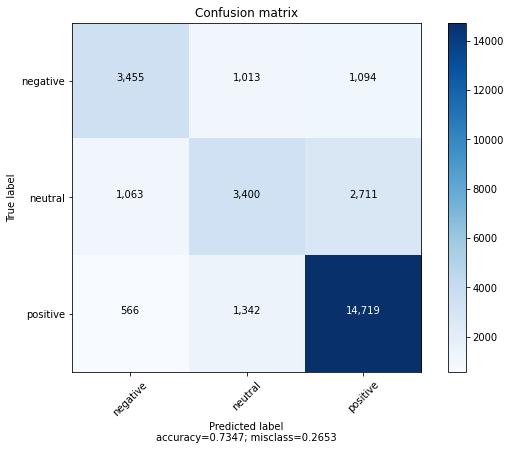

In [86]:
# Result
printResult(y_pred_bow_svm, y_prob_bow_svm)

TF-IDF SVM (with stopwords)

In [87]:
# Training 
model.fit(tfidf_with_stop_training_features, y_train)

# Evaluation
y_pred_with_stop_tfidf = model.predict(tfidf_with_stop_test_features)
y_prob_with_stop_tfidf = model.decision_function(tfidf_with_stop_test_features)

Accuracy: 76.46

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      5562
           1       0.63      0.50      0.56      7174
           2       0.82      0.90      0.86     16627

    accuracy                           0.76     29363
   macro avg       0.72      0.70      0.71     29363
weighted avg       0.75      0.76      0.76     29363



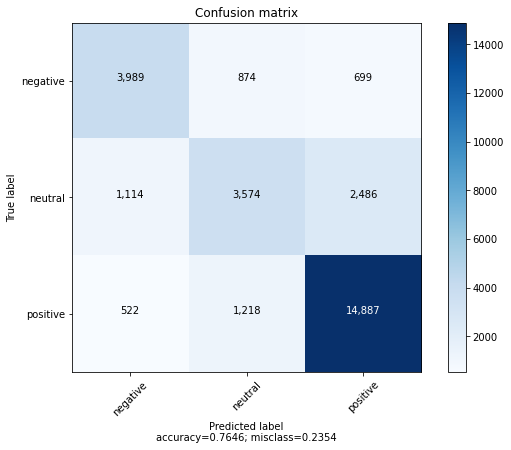

In [88]:
# Result
printResult(y_pred_with_stop_tfidf,y_prob_with_stop_tfidf)

TF-IDF SVM (without stopwords)

In [89]:
# Training 
model.fit(tfidf_without_stop_training_features, y_train)

# Evaluation
y_pred_without_stop_tfidf = model.predict(tfidf_without_stop_test_features)
y_prob_without_stop_tfidf = model.decision_function(tfidf_without_stop_test_features)

Accuracy: 75.00

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      5562
           1       0.62      0.48      0.54      7174
           2       0.81      0.89      0.85     16627

    accuracy                           0.75     29363
   macro avg       0.70      0.69      0.69     29363
weighted avg       0.74      0.75      0.74     29363



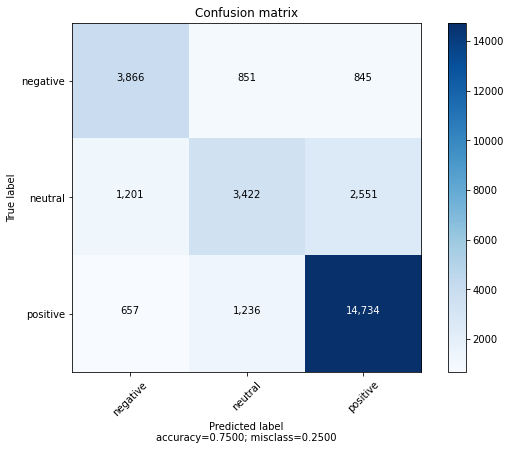

In [90]:
# Result
printResult(y_pred_without_stop_tfidf,y_prob_without_stop_tfidf)

Word2vec SVM
-with stopwords

In [91]:
# Training 
model.fit(word2vec_with_stop_training_features, y_train)

# Evaluation
y_pred_word2vec_stopwords_svm = model.predict(word2vec_with_stop_test_features)
y_prob_word2vec_stopwords_svm = model.decision_function(word2vec_with_stop_test_features)

Accuracy: 56.53

              precision    recall  f1-score   support

           0       0.27      0.01      0.02      5562
           1       0.45      0.03      0.06      7174
           2       0.57      0.98      0.72     16627

    accuracy                           0.57     29363
   macro avg       0.43      0.34      0.27     29363
weighted avg       0.48      0.57      0.43     29363



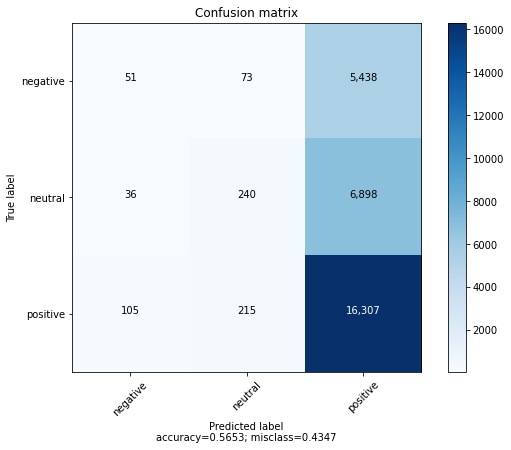

In [92]:
# Result
printResult(y_pred_word2vec_stopwords_svm,y_prob_word2vec_stopwords_svm)

 Word2vec SVM -without stopwords

In [93]:
# Training 
model.fit(word2vec_without_stop_training_features, y_train)

# Evaluation
y_pred_word2vec_svm = model.predict(word2vec_without_stop_test_features)
y_prob_word2vec_svm = model.decision_function(word2vec_without_stop_test_features)

Accuracy: 56.33

              precision    recall  f1-score   support

           0       0.34      0.01      0.02      5562
           1       0.34      0.02      0.03      7174
           2       0.57      0.98      0.72     16627

    accuracy                           0.56     29363
   macro avg       0.41      0.34      0.26     29363
weighted avg       0.47      0.56      0.42     29363



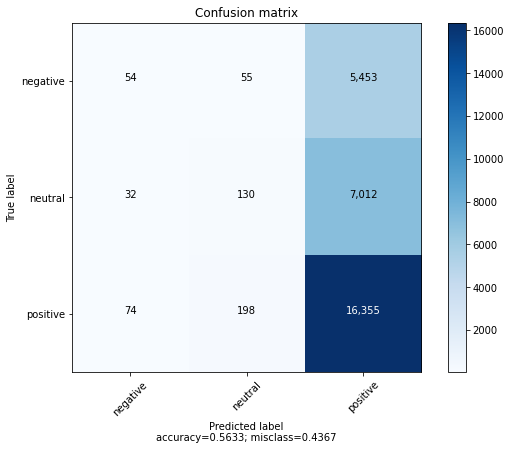

In [94]:
# Result
printResult(y_pred_word2vec_svm, y_prob_word2vec_svm)

BERT SVM 

In [95]:
# Training 
model.fit(BERT_train_features, y_train)

# Evaluation
y_pred_BERT_svm = model.predict(BERT_test_features)
y_prob_BERT_svm = model.decision_function(BERT_test_features)

Accuracy: 73.73

              precision    recall  f1-score   support

           0       0.69      0.66      0.67      5562
           1       0.62      0.42      0.51      7174
           2       0.78      0.90      0.84     16627

    accuracy                           0.74     29363
   macro avg       0.70      0.66      0.67     29363
weighted avg       0.72      0.74      0.72     29363



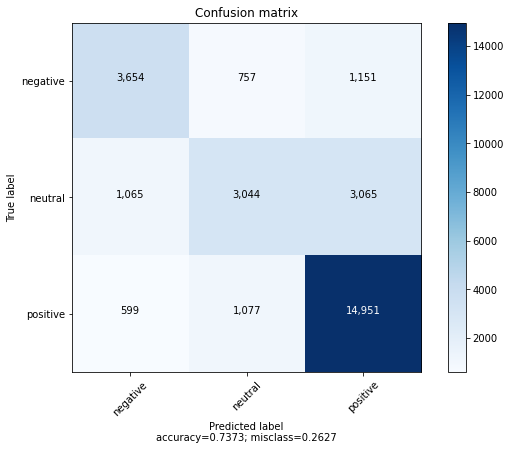

In [96]:
# Result
printResult(y_pred_BERT_svm, y_prob_BERT_svm)

## Naives Bayes 

In [97]:
model2 = MultinomialNB()

In [98]:
# Training 
model2.fit(bow_training_features.toarray(), y_train)

# Evaluation
y_pred_bow_nb = model2.predict(bow_test_features.toarray())
y_prob_bow_nb = model2.predict_proba(bow_test_features.toarray())[:,1]

Accuracy: 68.18

              precision    recall  f1-score   support

           0       0.59      0.63      0.61      5562
           1       0.49      0.36      0.41      7174
           2       0.77      0.84      0.80     16627

    accuracy                           0.68     29363
   macro avg       0.62      0.61      0.61     29363
weighted avg       0.67      0.68      0.67     29363



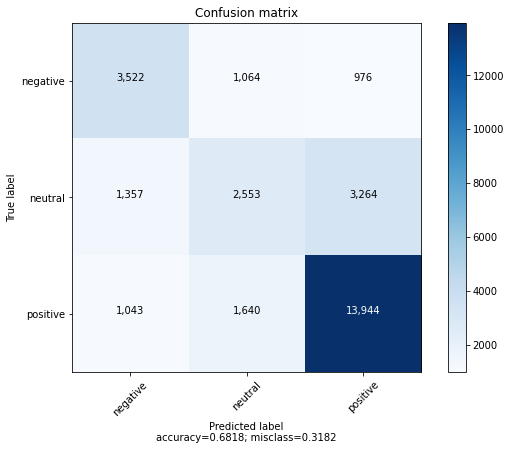

In [99]:
# Result
printResult(y_pred_bow_nb, y_prob_bow_nb)

TF-IDF NB (with stopwords)

In [100]:
# Training 
model2.fit(tfidf_with_stop_training_features.toarray(), y_train)

# Evaluation
y_pred_tfidf_with_stop_nb = model2.predict(tfidf_with_stop_test_features.toarray())
y_prob_tfidf_with_stop_nb = model2.predict_proba(tfidf_with_stop_test_features.toarray())[:,1]

Accuracy: 74.17

              precision    recall  f1-score   support

           0       0.62      0.77      0.69      5562
           1       0.62      0.45      0.52      7174
           2       0.83      0.86      0.84     16627

    accuracy                           0.74     29363
   macro avg       0.69      0.69      0.68     29363
weighted avg       0.74      0.74      0.73     29363



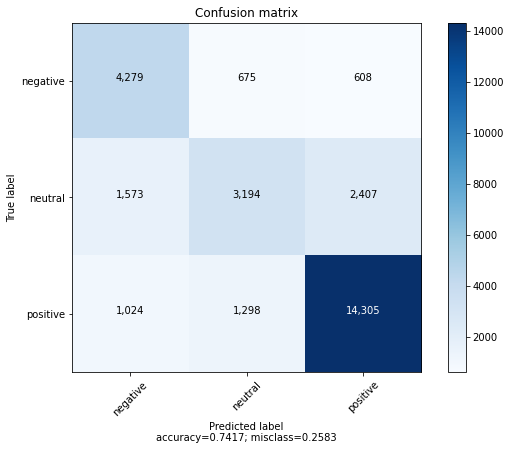

In [101]:
# Result
printResult(y_pred_tfidf_with_stop_nb, y_prob_tfidf_with_stop_nb)

TF-IDF NB (without stop)

In [102]:
# Training 
model2.fit(tfidf_without_stop_training_features.toarray(), y_train)

# Evaluation
y_pred_tfidf_without_stop_nb = model2.predict(tfidf_without_stop_test_features.toarray())
y_prob_tfidf_without_stop_nb = model2.predict_proba(tfidf_without_stop_test_features.toarray())[:,1]

Accuracy: 73.56

              precision    recall  f1-score   support

           0       0.63      0.71      0.67      5562
           1       0.62      0.44      0.51      7174
           2       0.81      0.87      0.84     16627

    accuracy                           0.74     29363
   macro avg       0.68      0.67      0.67     29363
weighted avg       0.73      0.74      0.73     29363



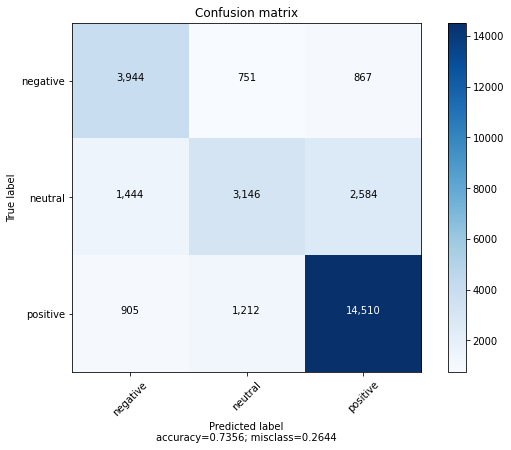

In [103]:
# Result
printResult(y_pred_tfidf_without_stop_nb, y_prob_tfidf_without_stop_nb)

Word2vec NB (with stopwords)

In [104]:
# Training 
model2 = GaussianNB()
model2.fit(word2vec_with_stop_training_features, y_train)

# Evaluation
y_pred_word2vec_with_stop_nb = model2.predict(word2vec_with_stop_test_features)
y_prob_word2vec_with_stop_nb = model2.predict_proba(word2vec_with_stop_test_features)[:,1]

Accuracy: 34.49

              precision    recall  f1-score   support

           0       0.24      0.62      0.34      5562
           1       0.30      0.35      0.32      7174
           2       0.67      0.25      0.36     16627

    accuracy                           0.34     29363
   macro avg       0.40      0.41      0.34     29363
weighted avg       0.49      0.34      0.35     29363



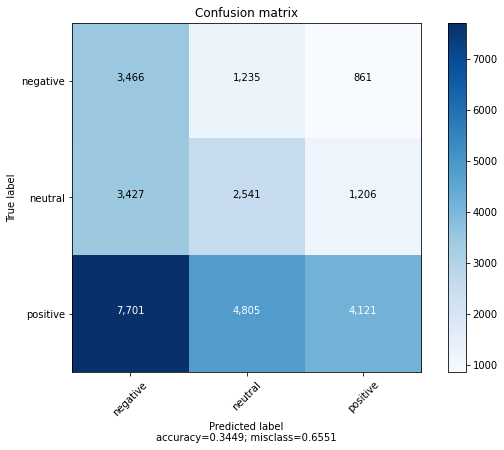

In [105]:
# Result
printResult(y_pred_word2vec_with_stop_nb,y_prob_word2vec_with_stop_nb)

Word2vec NB (without stopwords)

In [132]:
# Training 
model2 = GaussianNB()
model2.fit(word2vec_without_stop_training_features, y_train)

# Evaluation
y_pred_word2vec_without_stop_nb = model2.predict(word2vec_without_stop_test_features)
y_prob_word2vec_without_stop_nb = model2.predict_proba(word2vec_without_stop_test_features)[:,1]

Accuracy: 33.53

              precision    recall  f1-score   support

           0       0.23      0.54      0.32      5562
           1       0.30      0.48      0.37      7174
           2       0.69      0.21      0.32     16627

    accuracy                           0.34     29363
   macro avg       0.41      0.41      0.34     29363
weighted avg       0.51      0.34      0.33     29363



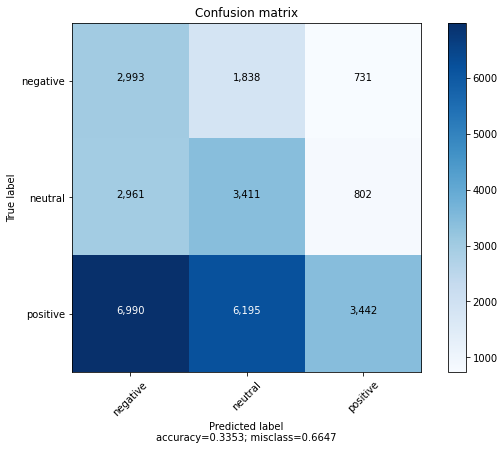

In [134]:
printResult(y_pred_word2vec_without_stop_nb ,y_prob_word2vec_without_stop_nb)

BERT_NB


In [108]:
# Training 
model2 = GaussianNB()
model2.fit(BERT_train_features, y_train)

# Evaluation
y_pred_BERT_nb = model2.predict(BERT_test_features)
y_prob_BERT_nb = model2.predict_proba(BERT_test_features)[:,1]

Accuracy: 52.76

              precision    recall  f1-score   support

           0       0.35      0.77      0.49      5562
           1       0.39      0.38      0.38      7174
           2       0.83      0.51      0.63     16627

    accuracy                           0.53     29363
   macro avg       0.52      0.55      0.50     29363
weighted avg       0.63      0.53      0.54     29363



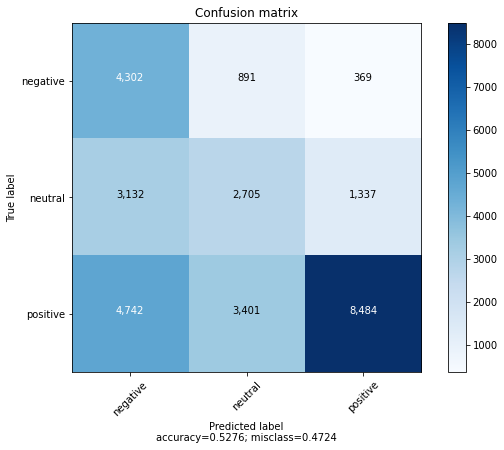

In [109]:
# Result
printResult(y_pred_BERT_nb, y_prob_BERT_nb)

## Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
model3= LogisticRegression(C=5.2,solver='liblinear')

BOW LR

In [114]:
# Training 
model3.fit(bow_training_features, y_train)

# Evaluation
y_pred_bow_lr = model3.predict(bow_test_features)
y_prob_bow_lr = model3.decision_function(bow_test_features)

Accuracy: 73.72

              precision    recall  f1-score   support

           0       0.68      0.63      0.65      5562
           1       0.59      0.48      0.53      7174
           2       0.80      0.88      0.84     16627

    accuracy                           0.74     29363
   macro avg       0.69      0.66      0.67     29363
weighted avg       0.73      0.74      0.73     29363



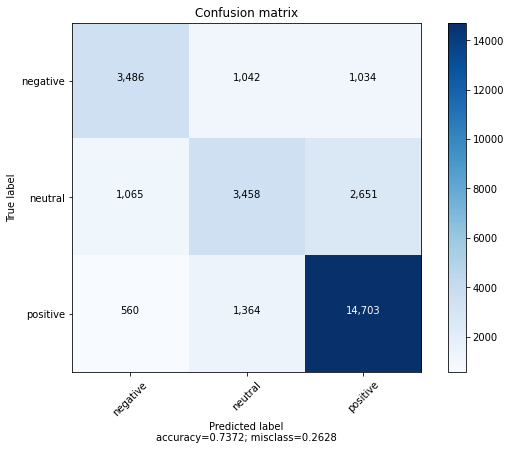

In [115]:
# Result
printResult(y_pred_bow_lr, y_prob_bow_lr)

TF-IDF LR with stop words

In [116]:
# Training 
model3.fit(tfidf_with_stop_training_features, y_train)

# Evaluation
y_pred_lr_stop_tfidf = model3.predict(tfidf_with_stop_test_features)
y_prob_lr_stop_tfidf = model3.decision_function(tfidf_with_stop_test_features)

Accuracy: 76.85

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      5562
           1       0.63      0.51      0.56      7174
           2       0.83      0.90      0.86     16627

    accuracy                           0.77     29363
   macro avg       0.73      0.71      0.72     29363
weighted avg       0.76      0.77      0.76     29363



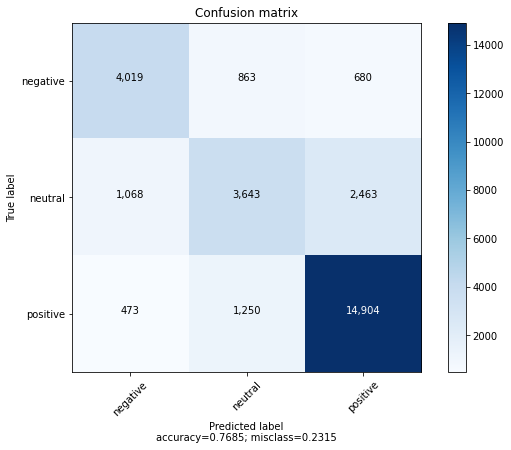

In [117]:
# Result
printResult(y_pred_lr_stop_tfidf,y_prob_lr_stop_tfidf)

TF-IDF LR without stop words

In [120]:
# Training 
model3.fit(tfidf_without_stop_training_features, y_train)

# Evaluation
y_pred_lr_tfidf = model3.predict(tfidf_without_stop_test_features)
y_prob_lr_tfidf = model3.decision_function(tfidf_without_stop_test_features)

Accuracy: 75.38

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      5562
           1       0.62      0.49      0.55      7174
           2       0.81      0.89      0.85     16627

    accuracy                           0.75     29363
   macro avg       0.71      0.69      0.70     29363
weighted avg       0.74      0.75      0.75     29363



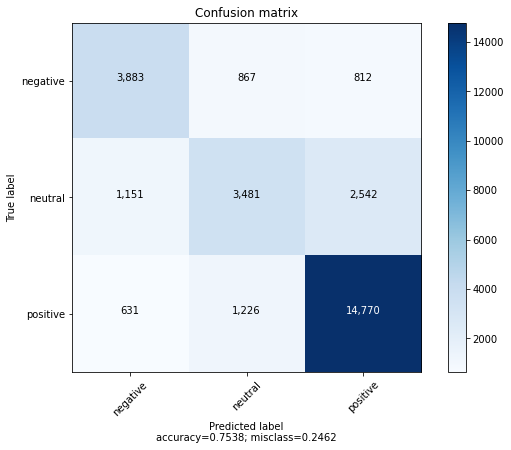

In [122]:
# Result
printResult(y_pred_lr_tfidf,y_prob_lr_tfidf)

Word2vec LR with stop words 

In [125]:
# Training 
model3.fit(word2vec_with_stop_training_features, y_train)

# Evaluation
y_pred_word2vec_stopwords_lr = model3.predict(word2vec_with_stop_test_features)
y_prob_word2vec_stopwords_lr = model3.decision_function(word2vec_with_stop_test_features)

Accuracy: 56.43

              precision    recall  f1-score   support

           0       0.28      0.01      0.03      5562
           1       0.44      0.04      0.07      7174
           2       0.57      0.98      0.72     16627

    accuracy                           0.56     29363
   macro avg       0.43      0.34      0.27     29363
weighted avg       0.48      0.56      0.43     29363



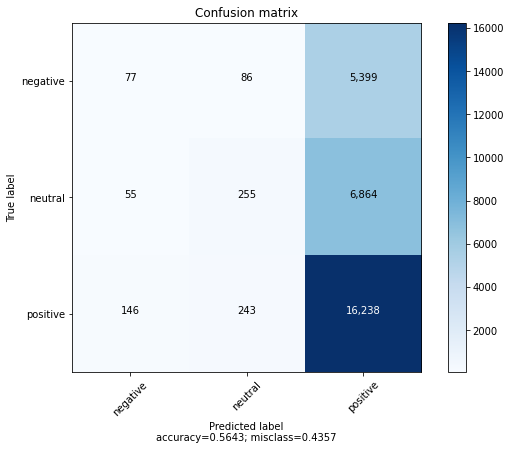

In [126]:
# Result
printResult(y_pred_word2vec_stopwords_lr, y_prob_word2vec_stopwords_lr)

Word2vec LR without stop words 

In [128]:
# Training 
model3.fit(word2vec_without_stop_training_features, y_train)

# Evaluation
y_pred_word2vec_without_stopwords_lr = model3.predict(word2vec_without_stop_test_features)
y_prob_word2vec_without_stopwords_lr = model3.decision_function(word2vec_without_stop_test_features)

Accuracy: 56.38

              precision    recall  f1-score   support

           0       0.30      0.01      0.02      5562
           1       0.39      0.03      0.05      7174
           2       0.57      0.98      0.72     16627

    accuracy                           0.56     29363
   macro avg       0.42      0.34      0.26     29363
weighted avg       0.48      0.56      0.42     29363



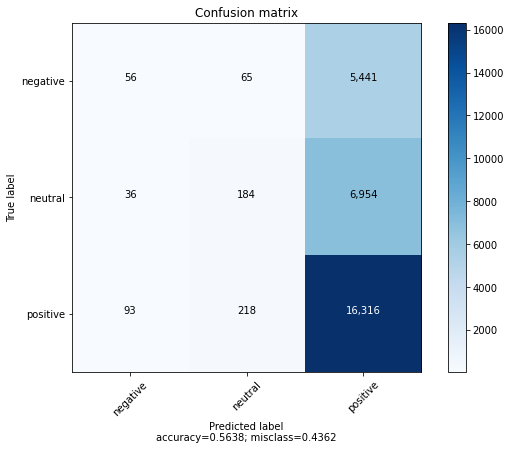

In [129]:
# Result
printResult(y_pred_word2vec_without_stopwords_lr, y_prob_word2vec_without_stopwords_lr)

BERT LR

In [123]:
model3.fit(BERT_train_features, y_train)

# Evaluation
y_pred_BERT_lr = model3.predict(BERT_test_features)
y_prob_BERT_lr = model3.decision_function(BERT_test_features)

Accuracy: 73.69

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      5562
           1       0.62      0.43      0.51      7174
           2       0.79      0.89      0.84     16627

    accuracy                           0.74     29363
   macro avg       0.69      0.66      0.67     29363
weighted avg       0.72      0.74      0.72     29363



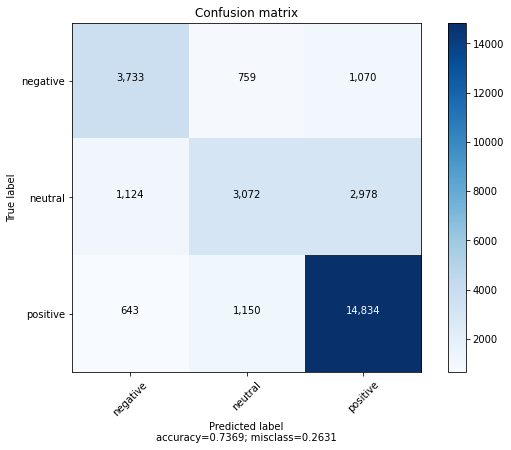

In [124]:
# Result
printResult(y_pred_BERT_lr, y_prob_BERT_lr)